<a href="https://colab.research.google.com/github/AlenaAntipina/PytorchLearning/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch 
import torchvision
from torchvision import transforms

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train = True, 
                                      download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, 
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train = False, 
                                      download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4, 
                                          shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
trainloader.dataset.data.shape

(50000, 32, 32, 3)

In [4]:
testloader.dataset.data.shape

(10000, 32, 32, 3)

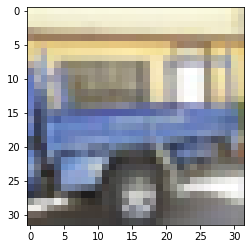

In [5]:
i = np.random.randint(low=0, high=50000)
plt.imshow(trainloader.dataset.data[i])

In [6]:
next(iter(trainloader))[0].shape

torch.Size([4, 3, 32, 32])

In [7]:
import torch.nn as nn
import torch.nn.functional as F

In [8]:
class MyConvNet(nn.Module):
  def __init__(self):
    super(MyConvNet, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
    self.fc1 = nn.Linear(6 * 6 * 128, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    # shape = (32,32)
    x = self.pool(F.relu(self.conv1(x)))
    # shape = (14,14)    // 32 - 4 %kernel_size-1 = 4% = 28 / 2 = 14
    x = self.pool(F.relu(self.conv2(x)))
    # shape = (6,6)
    # print(x.shape)
    x = x.view(-1, 6 * 6 * 128)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [ ]:
net = MyConvNet()

batch = []

for x in trainloader:
  batch = x
  break

net.forward(torch.FloatTensor(batch[0]))

In [9]:
from tqdm import tqdm_notebook

In [10]:
net = MyConvNet()

loss_fn = torch.nn.CrossEntropyLoss()

learning_rate = 1e-4
optimizer = torch.optim.Adam(net.parameters(), lr = learning_rate)
# losses = []

In [13]:
for epoch in tqdm_notebook(range(10)):
  running_loss = 0.0
  for i, batch in enumerate(tqdm_notebook(trainloader)):
    x_batch, y_batch = batch

    optimizer.zero_grad()

    y_pred = net(x_batch)
    loss = loss_fn(y_pred, y_batch)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 2000 == 1999:
      print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
      # losses.append(running_loss)
      running_loss = 0.0

  # plt.figure(figsize=(10,7))
  # plt.plot(np.arange(len(losses)), losses)
  # plt.show()

print('Training is finished')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/12500 [00:00<?, ?it/s]

[1,  2000] loss: 0.291
[1,  4000] loss: 0.311
[1,  6000] loss: 0.316
[1,  8000] loss: 0.319
[1, 10000] loss: 0.327
[1, 12000] loss: 0.324


  0%|          | 0/12500 [00:00<?, ?it/s]

[2,  2000] loss: 0.239
[2,  4000] loss: 0.248
[2,  6000] loss: 0.260
[2,  8000] loss: 0.266
[2, 10000] loss: 0.277
[2, 12000] loss: 0.279


  0%|          | 0/12500 [00:00<?, ?it/s]

[3,  2000] loss: 0.181
[3,  4000] loss: 0.210
[3,  6000] loss: 0.212
[3,  8000] loss: 0.216
[3, 10000] loss: 0.234
[3, 12000] loss: 0.241


  0%|          | 0/12500 [00:00<?, ?it/s]

[4,  2000] loss: 0.147
[4,  4000] loss: 0.161
[4,  6000] loss: 0.175
[4,  8000] loss: 0.185
[4, 10000] loss: 0.183
[4, 12000] loss: 0.197


  0%|          | 0/12500 [00:00<?, ?it/s]

[5,  2000] loss: 0.112
[5,  4000] loss: 0.130
[5,  6000] loss: 0.138
[5,  8000] loss: 0.142
[5, 10000] loss: 0.170
[5, 12000] loss: 0.164


  0%|          | 0/12500 [00:00<?, ?it/s]

[6,  2000] loss: 0.098
[6,  4000] loss: 0.108
[6,  6000] loss: 0.119
[6,  8000] loss: 0.120
[6, 10000] loss: 0.127
[6, 12000] loss: 0.131


  0%|          | 0/12500 [00:00<?, ?it/s]

[7,  2000] loss: 0.079
[7,  4000] loss: 0.090
[7,  6000] loss: 0.103
[7,  8000] loss: 0.099
[7, 10000] loss: 0.120
[7, 12000] loss: 0.104


  0%|          | 0/12500 [00:00<?, ?it/s]

[8,  2000] loss: 0.068
[8,  4000] loss: 0.082
[8,  6000] loss: 0.092
[8,  8000] loss: 0.088
[8, 10000] loss: 0.099
[8, 12000] loss: 0.099


  0%|          | 0/12500 [00:00<?, ?it/s]

[9,  2000] loss: 0.055
[9,  4000] loss: 0.076
[9,  6000] loss: 0.074
[9,  8000] loss: 0.089
[9, 10000] loss: 0.083
[9, 12000] loss: 0.082


  0%|          | 0/12500 [00:00<?, ?it/s]

[10,  2000] loss: 0.053
[10,  4000] loss: 0.065
[10,  6000] loss: 0.062
[10,  8000] loss: 0.071
[10, 10000] loss: 0.082
[10, 12000] loss: 0.069
Training is finished


In [14]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
  for data in testloader:
    images, labels = data
    y_pred = net(images)
    _, predicted = torch.max(y_pred, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1

for i in range(10):
  print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 73 %
Accuracy of   car : 77 %
Accuracy of  bird : 59 %
Accuracy of   cat : 57 %
Accuracy of  deer : 60 %
Accuracy of   dog : 58 %
Accuracy of  frog : 79 %
Accuracy of horse : 78 %
Accuracy of  ship : 84 %
Accuracy of truck : 88 %


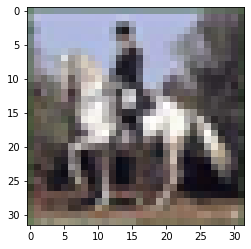

In [17]:
i = np.random.randint(low=0, high=10000)
plt.imshow(testloader.dataset.data[i])

In [18]:
from torchvision.transforms import ToPILImage
show = ToPILImage()

Фактическая метка:      cat     ship     ship    plane


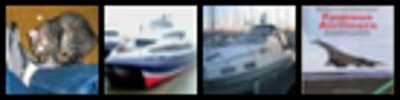

In [20]:
dataiter = iter(testloader)
images, labels = dataiter.next() # Партия возвращает 4 картинки
print('Фактическая метка:', ' '.join(\
            '%08s'%classes[labels[j]] for j in range(4)))
# show(tv.utils.make_grid(images / 2 - 0.5)).resize((400,100))
show(torchvision.utils.make_grid((images+1) / 2 )).resize((400,100))

In [21]:
images.shape
# Рассчитать балл картинки по каждой категории
outputs = net(images)   # images Данные на 4 картинки
# Самый высокий балльный класс
_, predicted = torch.max(outputs.data, 1)   # 1 - параметр измерения, возвращаемое значение равно двум, одно - максимальное значение, а другое - индекс максимального значения.

print('Прогнозируемый результат:', ' '.join('%5s'\
            % classes[predicted[j]] for j in range(4)))

Прогнозируемый результат:   cat  ship  ship plane
